# **LGBM & XGBM**

**Objective:**

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

**Tasks:**

Task 1: Exploratory Data Analysis (EDA)

1) Load the Titanic dataset using Python's pandas library.

2) Check for missing values.

3) Explore data distributions using histograms and box plots.

4) Visualize relationships between features and survival using scatter plots and bar plots.

Task 2: Data Preprocessing

1) Impute missing values.

2) Encode categorical variables using one-hot encoding or label encoding.

3) If needed you can apply more preprocessing methods on the given dataset.

Task 3: Building Predictive Models

1) Split the preprocessed dataset into training and testing sets.

2) Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3) Build predictive models using LightGBM and XGBoost algorithms.

4) Train the models on the training set and evaluate their performance on the testing set.

5) Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Task 4: Comparative Analysis

1) Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

2) Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

**Task 1: Exploratory Data Analysis (EDA)**

1) Load the Titanic dataset using Python's pandas library.

In [ ]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of each dataset
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


2) Check for missing values.

In [ ]:
# Check for missing values in training and testing data
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


3) Explore data distributions using histograms and box plots.

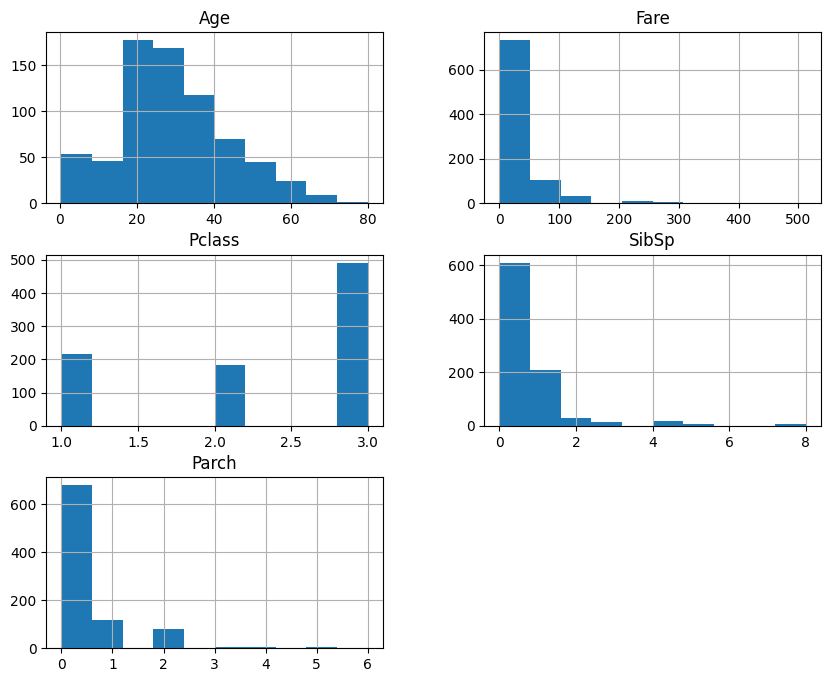

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

train_data[numerical_features].hist(figsize=(10, 8))
plt.show()


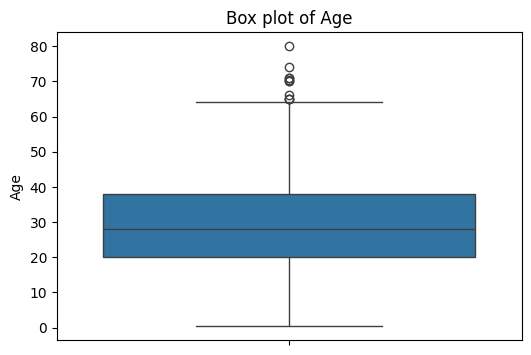

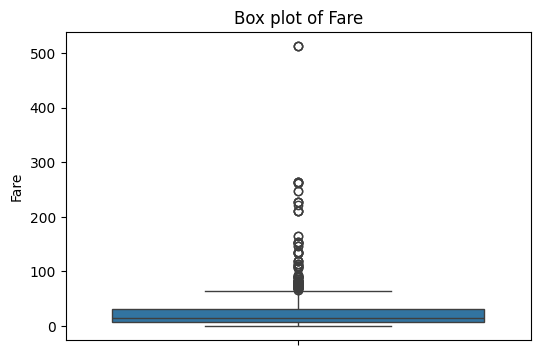

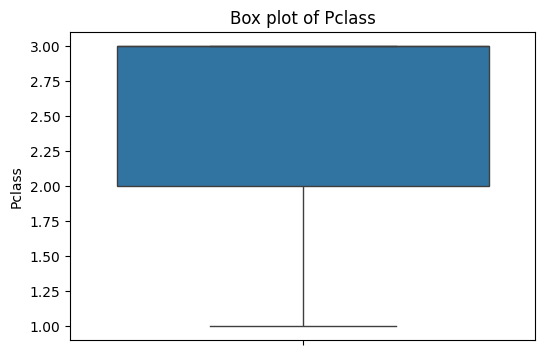

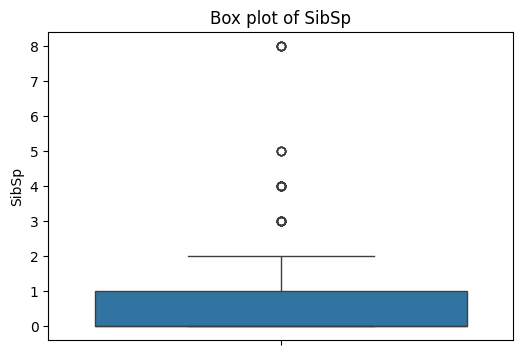

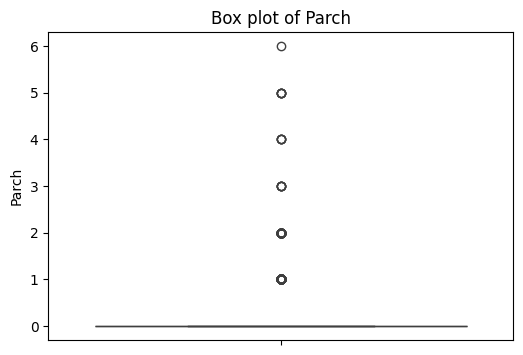

In [ ]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=train_data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

4) Visualize relationships between features and survival using scatter plots and bar plots.

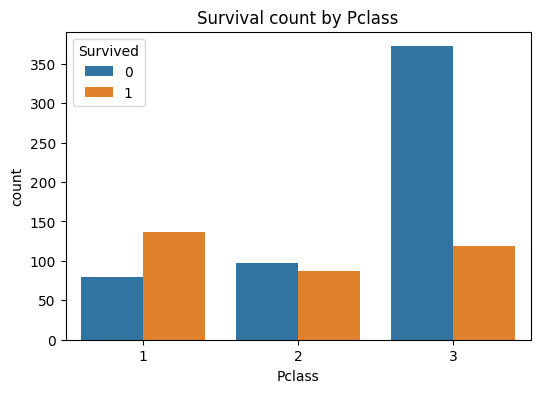

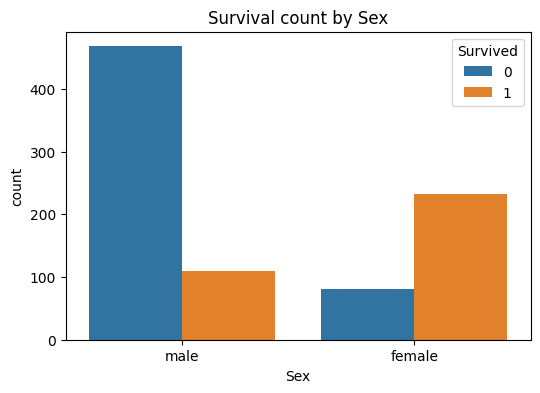

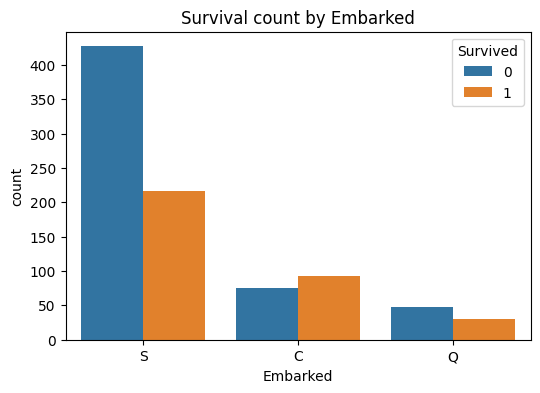

In [ ]:
# Bar plots for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train_data[feature], hue=train_data['Survived'])
    plt.title(f'Survival count by {feature}')
    plt.show()


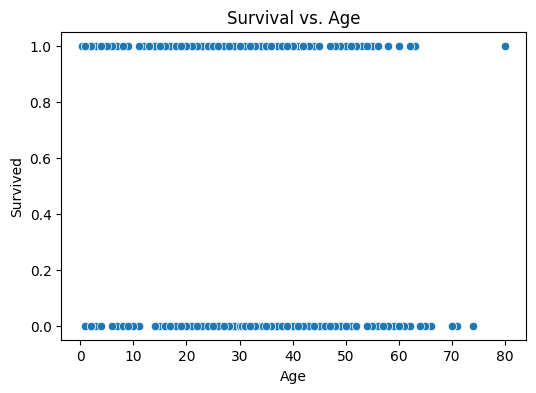

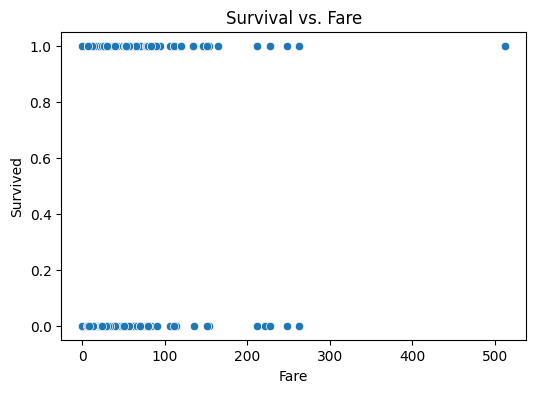

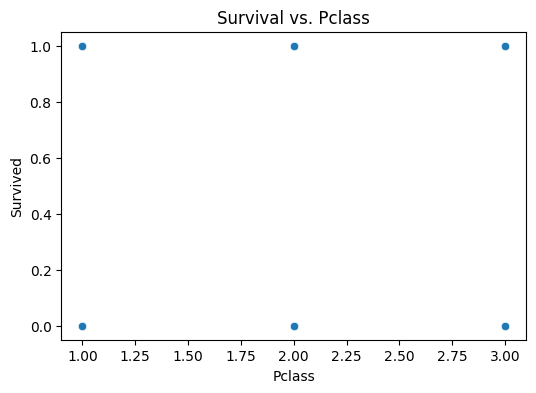

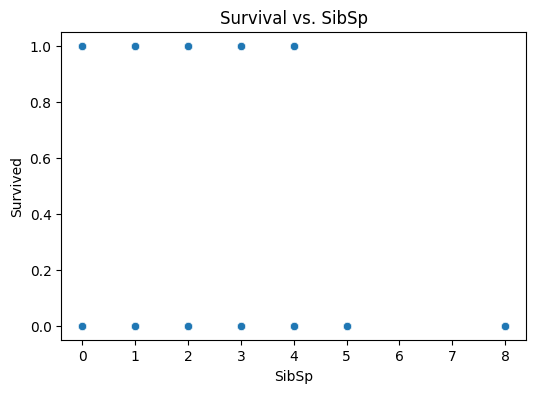

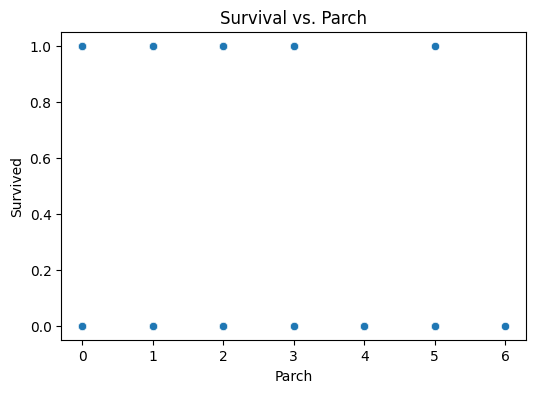

In [ ]:
# Scatter plot for numerical features vs. survival
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_data[feature], y=train_data['Survived'])
    plt.title(f'Survival vs. {feature}')
    plt.show()

**Task 2: Data Preprocessing**

1) Impute missing values.

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for 'Age' and 'Fare' using the median
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])
train_data['Fare'] = imputer.fit_transform(train_data[['Fare']])
test_data['Fare'] = imputer.transform(test_data[['Fare']])

# Impute missing 'Embarked' with the most frequent value
imputer2 = SimpleImputer(strategy='most_frequent')
# train_data['Embarked'] = imputer2.fit_transform(train_data[['Embarked']])
# test_data['Embarked'] = imputer2.transform(test_data[['Embarked']])


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2) Encode categorical variables using one-hot encoding or label encoding.

In [ ]:
# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Pclass','Sex', 'Embarked'], drop_first=True,)
test_data = pd.get_dummies(test_data, columns=['Pclass','Sex', 'Embarked'], drop_first=True)

# Ensure the test set has the same columns as the training set
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns.drop('Survived')]


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
test_data.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

**Task 3: Building Predictive Models**

1) Split the preprocessed dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2) Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


3) Build predictive models using LightGBM and XGBoost algorithms.

In [ ]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(lgb_model, X_test, y_test)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_model, X_test, y_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

4) Train the models on the training set and evaluate their performance on the testing set.

In [ ]:
# Print performance metrics
print(f"LightGBM - Accuracy: {lgb_accuracy}, Precision: {lgb_precision}, Recall: {lgb_recall}, F1 Score: {lgb_f1}")
print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1}")

LightGBM - Accuracy: 0.7988826815642458, Precision: 0.7714285714285715, Recall: 0.7297297297297297, F1 Score: 0.75
XGBoost - Accuracy: 0.7988826815642458, Precision: 0.7638888888888888, Recall: 0.7432432432432432, F1 Score: 0.7534246575342465


5) Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
best_lgb_model = lgb_grid.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Evaluate the best models
best_lgb_accuracy, best_lgb_precision, best_lgb_recall, best_lgb_f1 = evaluate_model(best_lgb_model, X_test, y_test)
best_xgb_accuracy, best_xgb_precision, best_xgb_recall, best_xgb_f1 = evaluate_model(best_xgb_model, X_test, y_test)

print(f"Best LightGBM - Accuracy: {best_lgb_accuracy}, Precision: {best_lgb_precision}, Recall: {best_lgb_recall}, F1 Score: {best_lgb_f1}")
print(f"Best XGBoost - Accuracy: {best_xgb_accuracy}, Precision: {best_xgb_precision}, Recall: {best_xgb_recall}, F1 Score: {best_xgb_f1}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

**Task 4: Comparative Analysis**

1) Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [ ]:
# Comparing the models' performance
print("LightGBM:")
print(f"Accuracy: {best_lgb_accuracy}, Precision: {best_lgb_precision}, Recall: {best_lgb_recall}, F1 Score: {best_lgb_f1}")

print("XGBoost:")
print(f"Accuracy: {best_xgb_accuracy}, Precision: {best_xgb_precision}, Recall: {best_xgb_recall}, F1 Score: {best_xgb_f1}")


LightGBM:
Accuracy: 0.8212290502793296, Precision: 0.8, Recall: 0.7567567567567568, F1 Score: 0.7777777777777778
XGBoost:
Accuracy: 0.7988826815642458, Precision: 0.8064516129032258, Recall: 0.6756756756756757, F1 Score: 0.7352941176470588


2) Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

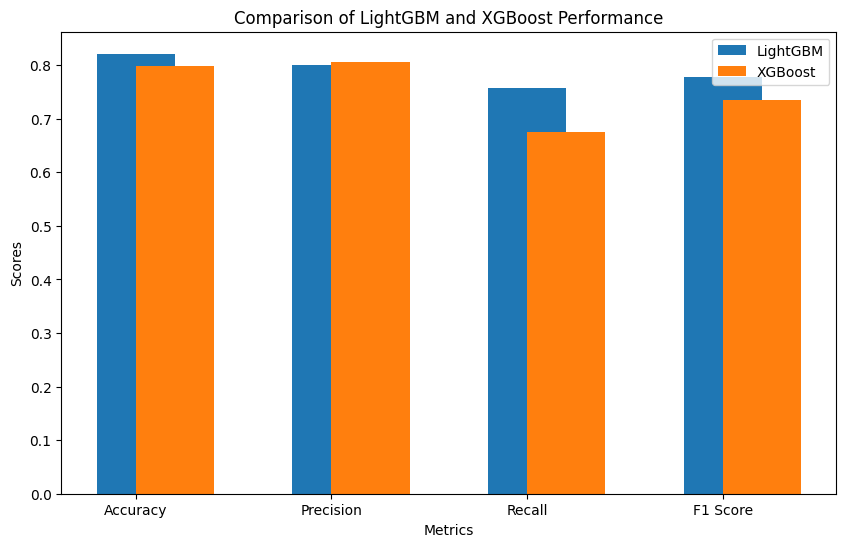

In [ ]:
import matplotlib.pyplot as plt

# Performance comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [best_lgb_accuracy, best_lgb_precision, best_lgb_recall, best_lgb_f1]
xgb_scores = [best_xgb_accuracy, best_xgb_precision, best_xgb_recall, best_xgb_f1]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', align='edge')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.legend()
plt.show()
